In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [44]:
# Import data
data = pd.read_csv('dummy_data.csv') #budget is in millions for each colum
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [45]:
# removing nan values
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4546 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4546 non-null   float64
 1   Radio         4546 non-null   float64
 2   Social Media  4546 non-null   float64
 3   Influencer    4546 non-null   object 
 4   Sales         4546 non-null   float64
dtypes: float64(4), object(1)
memory usage: 213.1+ KB


In [46]:
data["Influencer"].unique()

array(['Mega', 'Micro', 'Nano', 'Macro'], dtype=object)

array([[<AxesSubplot: title={'center': 'TV'}>,
        <AxesSubplot: title={'center': 'Radio'}>],
       [<AxesSubplot: title={'center': 'Social Media'}>,
        <AxesSubplot: title={'center': 'Sales'}>]], dtype=object)

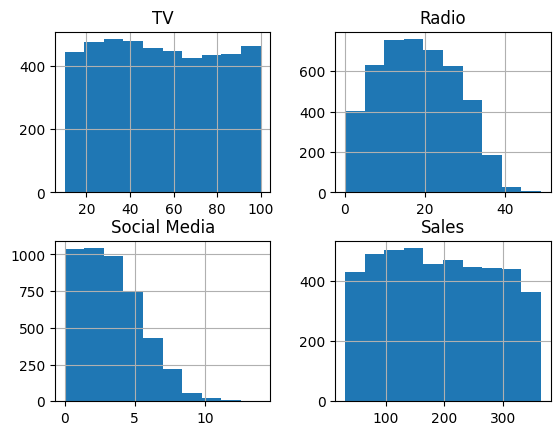

In [47]:
data.hist()

In [48]:
# Encoding influencer column using label encoder
encoder = LabelEncoder().fit(['Mega','Macro', 'Nano','Micro'])

data["Influencer"] = encoder.transform(data["Influencer"])
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,1,54.732757
1,13.0,9.237765,2.409567,1,46.677897
2,41.0,15.886446,2.913410,1,150.177829
3,83.0,30.020028,6.922304,1,298.246340
4,15.0,8.437408,1.405998,2,56.594181


In [58]:
# normalizing the input data using min max scaler
scaler = MinMaxScaler()
scaler.fit(data[data.columns[:-1]])

data[data.columns[:-1]] = scaler.transform(data[data.columns[:-1]])

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4546 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4546 non-null   float64
 1   Radio         4546 non-null   float64
 2   Social Media  4546 non-null   float64
 3   Influencer    4546 non-null   float64
 4   Sales         4546 non-null   float64
dtypes: float64(5)
memory usage: 213.1 KB


array([[<AxesSubplot: title={'center': 'TV'}>,
        <AxesSubplot: title={'center': 'Radio'}>],
       [<AxesSubplot: title={'center': 'Social Media'}>,
        <AxesSubplot: title={'center': 'Influencer'}>],
       [<AxesSubplot: title={'center': 'Sales'}>, <AxesSubplot: >]],
      dtype=object)

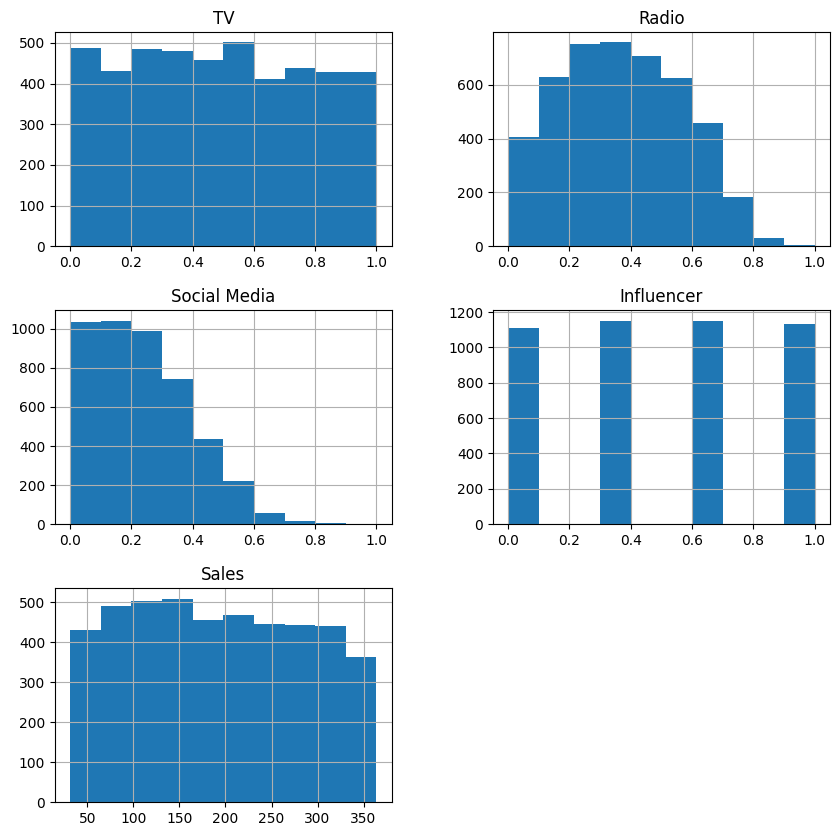

In [59]:
data.hist(figsize=(10,10))

<AxesSubplot: >

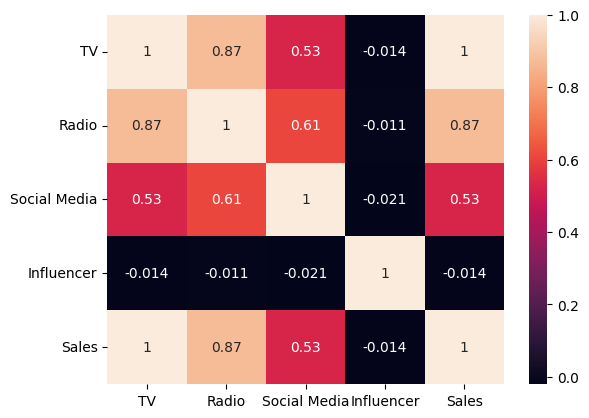

In [60]:
sns.heatmap(data.corr(), annot=True)

In [61]:
data.to_csv('dummy_data_processed.csv', index=False)